### Exercício extra - Conversão de powernoise.m para python

**Aluno:** André F. Oliveira

Este algoritmo é uma tradução para a linguagem python de um algoritmo para geração de ruído escrito em matlab. Exemplos dos ruídos gerados são mostrados ao final.

In [68]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import mlab

In [69]:
def powernoise(beta, N, *args):
    """
    Generate samples of power law noise, where the power spectrum of the signal scales as f**(-beta)
    ================
    Inputs
    beta: power law scaling exponent. 0: white noise, 1: pink noise, 2:red noise
    N: number of samples to generate
    *args: strings to specify the normalization of the output and the distribution of the power spectrum  
    'normalize' if the output is to be normalized between [-1,1]
    'randpower' if the power spectrum is to be stochastic with Chi-square distribution. Default is deterministic,
    and the phases are uniformly distributed in the range -pi to +pi.
    
    Output
    x: N x 1 cetor of power law samples
    """
    opt_randpow = False
    opt_normal = False
    
    args = [*args]
    if len([*args]) > 0:
        for i in args:
            if i == 'normalize':
                opt_normal = True
            elif i == 'randpower':
                opt_randpow = True
            else:
                raise ValueError("Entries should either be 'normalize' and/or 'randpower'")
            
    N2 = int(np.floor(N/2)-1)
    f = [i for i in range(2,N2+2)]
    A2 = [1/j**(beta/2) for j in f]
    
    if not opt_randpow:
        p2 = (np.array([random.random() for i in range(N2)])-0.5)*2*np.pi
        d2 = np.array([A2[i]*np.exp(1j*p2[i]) for i in range(len(A2))])
    
    else:
        p2 = np.random.normal(size=(N2,1)) + 1j*np.random.normal(size=(N2,1))
        d2 = np.array([A2[i]*p2[i] for i in range(len(A2))])
        
    d = np.insert(d2,0,1+0j)
    d = np.append(d,1/((N2+2)**beta))
    d = np.append(d,np.flipud(np.conj(d2)))
    
    x = np.real(np.fft.ifft(d))
    
    if opt_normal:
        x = ((x - min(x))/(max(x) - min(x)) - 0.5) * 2
        
    return x

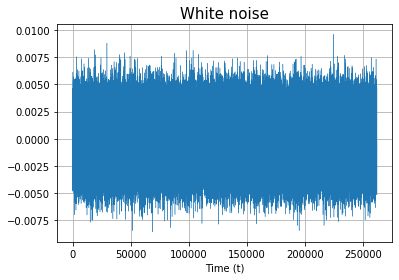

In [70]:
w = powernoise(0,2**18)
plt.plot(w,linewidth=0.4)
plt.title('White noise',fontsize=15)
plt.xlabel('Time (t)')
plt.grid()
plt.show()

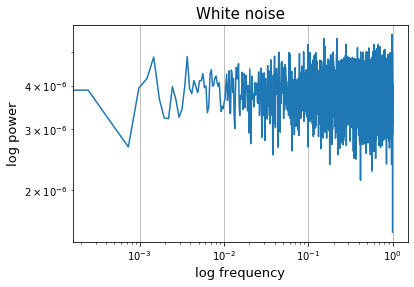

In [71]:
s, f = mlab.psd(w, NFFT=2**13)
plt.loglog(f,s)
plt.title('White noise',fontsize=15)
plt.ylabel('log power', fontsize=13)
plt.xlabel('log frequency', fontsize=13)
plt.grid()
plt.show()

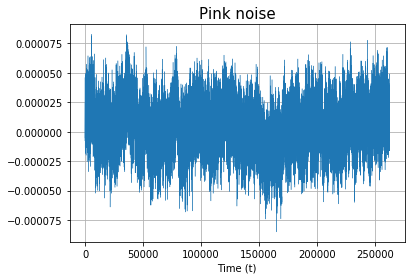

In [72]:
p = powernoise(1,2**18)
plt.plot(p,linewidth=0.4)
plt.title('Pink noise',fontsize=15)
plt.xlabel('Time (t)')
plt.grid()
plt.show()

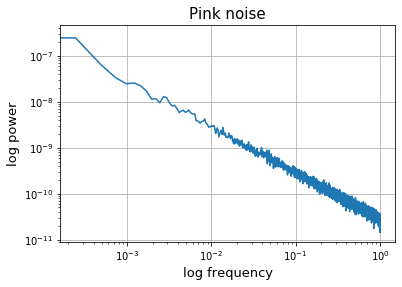

In [73]:
s, f = mlab.psd(p, NFFT=2**13)
plt.loglog(f,s)
plt.title('Pink noise',fontsize=15)
plt.ylabel('log power', fontsize=13)
plt.xlabel('log frequency', fontsize=13)
plt.grid()
plt.show()

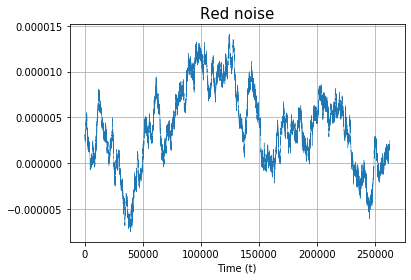

In [74]:
r = powernoise(2,2**18)
plt.plot(r,linewidth=0.4)
plt.title('Red noise',fontsize=15)
plt.xlabel('Time (t)')
plt.grid()
plt.show()

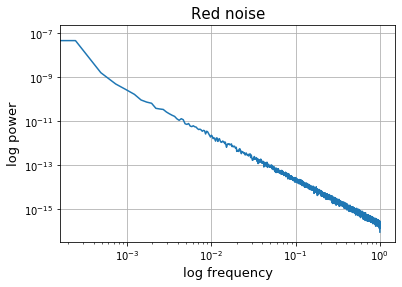

In [75]:
s, f = mlab.psd(r, NFFT=2**13)
plt.loglog(f,s)
plt.title('Red noise',fontsize=15)
plt.ylabel('log power', fontsize=13)
plt.xlabel('log frequency', fontsize=13)
plt.grid()
plt.show()